Top 10 similar wines to 22
Wine number:  24. Similarity:  95%. Alcohol: 13.5%.
Wine number:  29. Similarity:  94%. Alcohol: 14.02%.
Wine number:  35. Similarity:  94%. Alcohol: 13.48%.
Wine number:  23. Similarity:  94%. Alcohol: 12.85%.
Wine number:  32. Similarity:  93%. Alcohol: 13.68%.
Wine number:   1. Similarity:  93%. Alcohol: 13.2%.
Wine number:  54. Similarity:  93%. Alcohol: 13.74%.
Wine number:  12. Similarity:  93%. Alcohol: 13.75%.
Wine number:   0. Similarity:  93%. Alcohol: 14.23%.
Wine number:   9. Similarity:  92%. Alcohol: 13.86%.


Top 10 wines completely diffrent from 22
Wine number: 146. Similarity:  66%. Alcohol: 13.88%.
Wine number: 147. Similarity:  66%. Alcohol: 12.87%.
Wine number: 177. Similarity:  67%. Alcohol: 14.13%.
Wine number: 171. Similarity:  67%. Alcohol: 12.77%.
Wine number: 136. Similarity:  67%. Alcohol: 12.25%.
Wine number: 157. Similarity:  67%. Alcohol: 12.45%.
Wine number: 155. Similarity:  67%. Alcohol: 13.17%.
Wine number: 160. Similarity:  

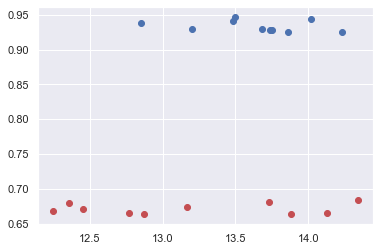

In [45]:
from sklearn import datasets
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

class Node:
    def __init__(self, value):
        self.value = value
        self.instances = 0
        self.l_weight = 0
        self.r_weight = 0
        self.similarity = 0

def get_parameters(df):
    parameter = {}
    for (name, data) in df.iteritems():
        obj = {}
        for value in data:
            obj[value] = Node(value)
        parameter[name] = collections.OrderedDict(sorted(obj.items()))
    return parameter

def get_instances(df, parameters):
    instances = {}
    for index in df.index:
        obj = {}
        for column in df.columns:
            value = df.at[index, column]
            obj[column] = parameters[column][value]
            obj[column].instances += 1
        instances[index] = obj
    return instances 

def get_min_and_max(parameters, instances):
    for param_name, instances in parameters.items():
        if param_name != "class":
            param_values = instances.keys()
            min_param_val = min(param_values)
            max_param_val = max(param_values)
            for node_index in range(len(instances)):
                nodes = list(instances.items())
                node_name, node = nodes[node_index]
                if node_index != 0:
                    _, l_neighbor = nodes[node_index - 1]
                    node.l_weight = calculate_weight(node, l_neighbor, min_param_val, max_param_val)
                if node_index != len(nodes) - 1:
                    _, r_neighbor = nodes[node_index + 1]
                    node.r_weight = calculate_weight(node, r_neighbor, min_param_val, max_param_val)

def calculate_all_nodes_similarities(index, parameters, instances):
    for param_name, node in instances[index].items():
        node.similarity = 1
        if param_name != "class":
            nodes = list(parameters[param_name].values())
            node_index = nodes.index(node)
            right_node = nodes[node_index:]
            left_node = list(reversed(nodes[:node_index + 1]))
            for i in range(1, len(right_node)):
                right_node[i].similarity = right_node[i - 1].similarity * right_node[i].l_weight
            for i in range(1, len(left_node)):
                left_node[i].similarity = left_node[i - 1].similarity * left_node[i].r_weight

def get_similarities(index, parameters, instances):
    similarities = {}
    for index, instance in instances.items():
        parameters = len(instance)
        values = []
        for node in instance.values():
            values.append(node.similarity)
        val_sum = 0
        for value in values:
            val_sum += value / parameters
        similarities[index] = val_sum
    return similarities

def calculate_weight(nodeA, nodeB, min_val, max_val):
    return 1 - abs(nodeA.value - nodeB.value) / (max_val - min_val)


def load_wines():
    wines = datasets.load_wine()
    df = pd.DataFrame(wines.data, columns=wines.feature_names)
    df = df.astype(float)
    df["class"] = wines.target_names[wines.target]
    return df


def main():
    node = 22
    
    df = load_wines()

    parameters = get_parameters(df)
    instances = get_instances(df, parameters)
    
    get_min_and_max(parameters, instances)
    calculate_all_nodes_similarities(node, parameters, instances)
    results = get_similarities(node, parameters, instances)
    
    ytop = []
    xtop = []
    yworst = []
    xworst = []
    
    print("Top 10 similar wines to {}".format(node))
    for number, similarity in list(sorted(results.items(), reverse=True, key=lambda item: item[1])[1:11]):
        print("Wine number: " + str(number).rjust(3) + 
              ". Similarity: " + "{0:.0%}".format(similarity).rjust(4) +
              ". Alcohol: {}".format(df.iloc[number]['alcohol']) + "%.")
        ytop.append(similarity)
        xtop.append(df.iloc[number]['alcohol'])
    print("\n")
    print("Top 10 wines completely diffrent from {}".format(node))
    for number, similarity in list(sorted(results.items(), reverse=False, key=lambda item: item[1])[1:11]):
        print("Wine number: " + str(number).rjust(3) + 
              ". Similarity: " + "{0:.0%}".format(similarity).rjust(4) + 
              ". Alcohol: {}".format(df.iloc[number]['alcohol']) + "%.")
        yworst.append(similarity)
        xworst.append(df.iloc[number]['alcohol'])

    plt.plot(xtop,ytop, 'bo')
    plt.plot(xworst, yworst, 'ro')

if __name__ == "__main__":
    main()
